In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing

In [7]:
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

In [8]:
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

In [18]:
df.head(5)

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop("income",1)
Y = df["income"]
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.5,test_size=0.5,random_state=50)

In [19]:
from sklearn import linear_model

# Ridge Regression
ridgeregr = linear_model.Ridge(alpha=10,fit_intercept=False)
ridgeregr.fit(X_train,y_train)
print("R2 score:",ridgeregr.score(X_test,y_test))

R2 score: 0.5642913262380984


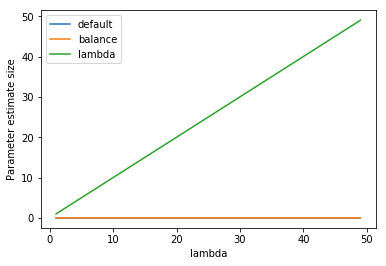

In [20]:
estimates = np.append(ridgeregr.coef_,[10])
for lambd in range(1,50,2):
    ridgeregr = linear_model.Ridge(alpha=lambd,fit_intercept=False)
    ridgeregr.fit(X_train,y_train)
    estimates = np.row_stack((estimates,np.append(ridgeregr.coef_,[lambd])))

ridge_df = pd.DataFrame(estimates,columns=list(X_train.columns) + ["lambda"])
ridge_df.sort_values(by='lambda',inplace=True,ascending=True)

ridgeplot = list(ridge_df.columns[:9,])
ridgeplot.remove("student")

labels = []
for var in ridgeplot:
    plt.plot(ridge_df["lambda"],ridge_df[var])
    labels.append(var)

plt.xlabel('lambda')
plt.ylabel("Parameter estimate size")
plt.legend(labels)
plt.show()

In [21]:
# Lasso Regression
lass = linear_model.Lasso(alpha = 0.35)
lassfit = lass.fit(X_train,y_train)
print("R2 score: ",lass.score(X_test,y_test))

R2 score:  0.450217970752628


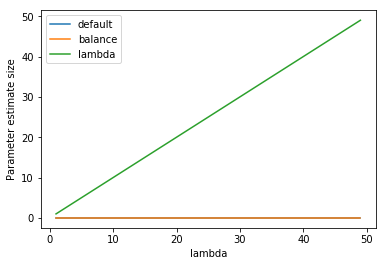

In [23]:
estimates = np.append(lass.coef_,[10])
for lambd in range(1,50,2):
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X_train,y_train)
    estimates = np.row_stack((estimates,np.append(lass.coef_,[lambd])))

lass_df = pd.DataFrame(estimates,columns=list(X_train.columns) + ["lambda"])
lass_df.sort_values(by='lambda',inplace=True,ascending=True)

lassplot = list(lass_df.columns[:9,])
lassplot.remove("student")

labels = []
for var in lassplot:
    plt.plot(lass_df["lambda"],lass_df[var])
    labels.append(var)

plt.xlabel('lambda')
plt.ylabel("Parameter estimate size")
plt.legend(labels)
plt.show()